# Breast Cancer Classification using K-Nearest Neighbors

### Project Brief

**Objective:** In this project, I'll employ K-Nearest Neighbors (KNN) to classify breast cancer cases. I'll classify breast cancer cases using KNN, optimize model parameters, perform dimensionality reduction with PCA, and visualize clusters in a 2D space.

Data source: Breast cancer data from sklearn.datasets

### Tasks Overview

Here's a breakdown of the tasks I'll be performing using Python:

1. **Data Load & Inspection**: I'll load and inspect the breast cancer dataset, exploring feature names and creating a label table.

2. **K Nearest Neighbors (KNN) Classification**: I'll train a KNN classifier with different k values, identify the optimal k, and visualize accuracy vs. k.

3. **Principal Component Analysis (PCA)**: I'll reduce dimensionality using PCA, determining the optimal components through cumulative explained variance and cross-validation.

4. **KNN Clustering Visualization**: I'll create a 2D visualization using PCA and KNN clustering, highlighting cluster labels.

Let's get started.

------

## Importing Libraries

In [1]:
from sklearn.datasets import load_breast_cancer # Import the breast cancer data
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

## Load Data

In [2]:
# Load breact cancer data from sklearn.datasets to breast_cancer_data
breast_cancer_data = load_breast_cancer()

## Inspect Data Names

In [3]:
# Print feature names
for feature_name in breast_cancer_data.feature_names:
    print(feature_name)

mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension


In [4]:
# Data to display in the table
data = [(value, label) for value, label in enumerate(breast_cancer_data.target_names)]

# Table headers
headers = ["Numeric Value", "Label"]

# Print the table
table = tabulate(data, headers, tablefmt="fancy_grid")
print(table)

╒═════════════════╤═══════════╕
│   Numeric Value │ Label     │
╞═════════════════╪═══════════╡
│               0 │ malignant │
├─────────────────┼───────────┤
│               1 │ benign    │
╘═════════════════╧═══════════╛


In [5]:
# Split the data into training and validation sets
training_data, validation_data, training_labels, validation_labels = train_test_split(
    breast_cancer_data.data, breast_cancer_data.target, test_size=0.2, random_state=100)

# Confirm the size of training_data and training_labels
print(len(training_data))
print(len(training_labels))

455
455


## K Nearest Neighbors Classification

### Train and Test Classifier on Validation Set

In [6]:
# Create a KNeighborsClassifier with n_neighbors = 3
classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
classifier.fit(training_data, training_labels)

# Test accuracy on the validation set
accuracy = classifier.score(validation_data, validation_labels)
print(f"Accuracy for {classifier.n_neighbors} neighbors is {round(accuracy, 3)}")

Accuracy for 3 neighbors is 0.947


### Hyperparameter Tuning

In [7]:
# Test different values of k and print validation accuracies
k_list = range(1, 101)  # Values of k from 1 to 100
accuracies = []

for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data, training_labels)
    accuracy = classifier.score(validation_data, validation_labels)
    accuracies.append(accuracy)
    print(f'k = {k}: Validation Accuracy = {accuracy}')

k = 1: Validation Accuracy = 0.9298245614035088
k = 2: Validation Accuracy = 0.9385964912280702
k = 3: Validation Accuracy = 0.9473684210526315
k = 4: Validation Accuracy = 0.9473684210526315
k = 5: Validation Accuracy = 0.9473684210526315
k = 6: Validation Accuracy = 0.9473684210526315
k = 7: Validation Accuracy = 0.9473684210526315
k = 8: Validation Accuracy = 0.9473684210526315
k = 9: Validation Accuracy = 0.956140350877193
k = 10: Validation Accuracy = 0.956140350877193
k = 11: Validation Accuracy = 0.956140350877193
k = 12: Validation Accuracy = 0.956140350877193
k = 13: Validation Accuracy = 0.956140350877193
k = 14: Validation Accuracy = 0.956140350877193
k = 15: Validation Accuracy = 0.956140350877193
k = 16: Validation Accuracy = 0.956140350877193
k = 17: Validation Accuracy = 0.956140350877193
k = 18: Validation Accuracy = 0.956140350877193
k = 19: Validation Accuracy = 0.956140350877193
k = 20: Validation Accuracy = 0.956140350877193
k = 21: Validation Accuracy = 0.956140350

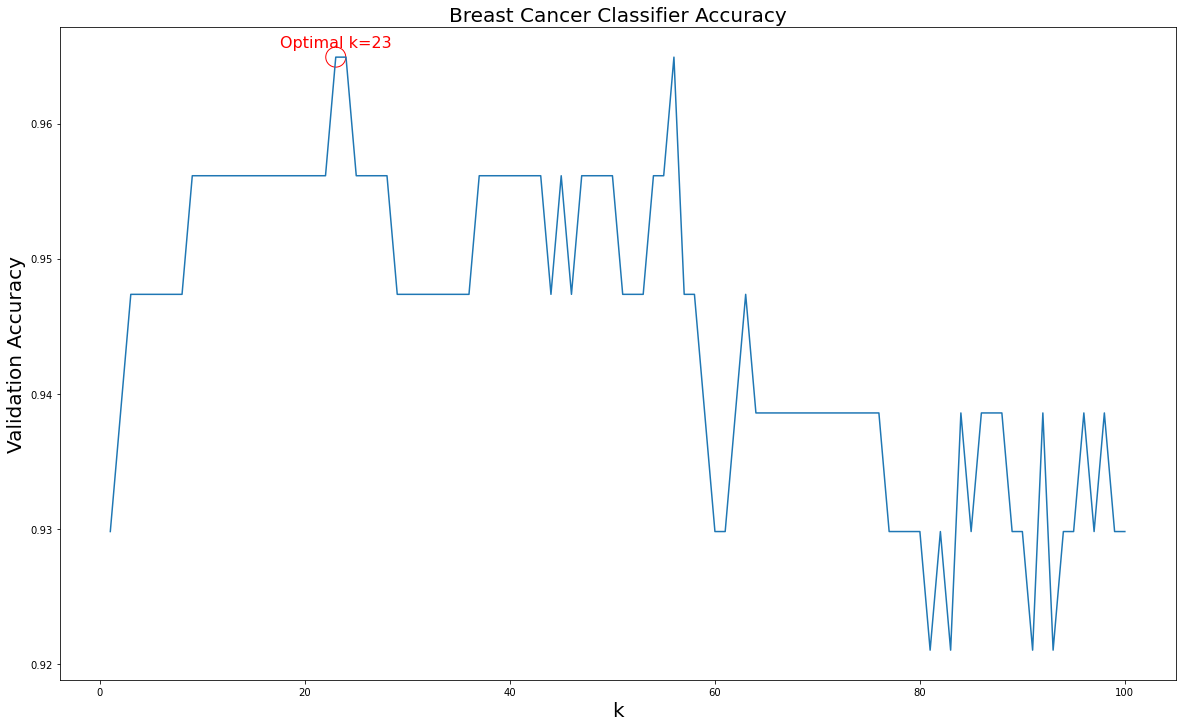

Optimal k: 23
Max Validation Accuracy: 0.965


In [8]:
# Find the maximum accuracy and its corresponding k
max_accuracy = max(accuracies)
optimal_k = k_list[accuracies.index(max_accuracy)]

# Plot the validation accuracies with the identified optimal k
plt.figure(figsize=(20, 12))
plt.plot(k_list, accuracies)
plt.xlabel('k', fontsize=20)
plt.ylabel('Validation Accuracy', fontsize=20)
plt.title('Breast Cancer Classifier Accuracy', fontsize=20)

# Mark the optimal k point on the plot
plt.scatter(optimal_k, max_accuracy, marker='o', edgecolor='red', facecolor='none', s=400)
plt.annotate(f'Optimal k={optimal_k}', (optimal_k, max_accuracy), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=16, color='red')

plt.show()

# Output optimal k and max validation accuracy in text form
print(f'Optimal k: {optimal_k}')
print(f'Max Validation Accuracy: {max_accuracy:.3f}')


## Identify Ideal Number of Components

### Cumulative Explained Variance

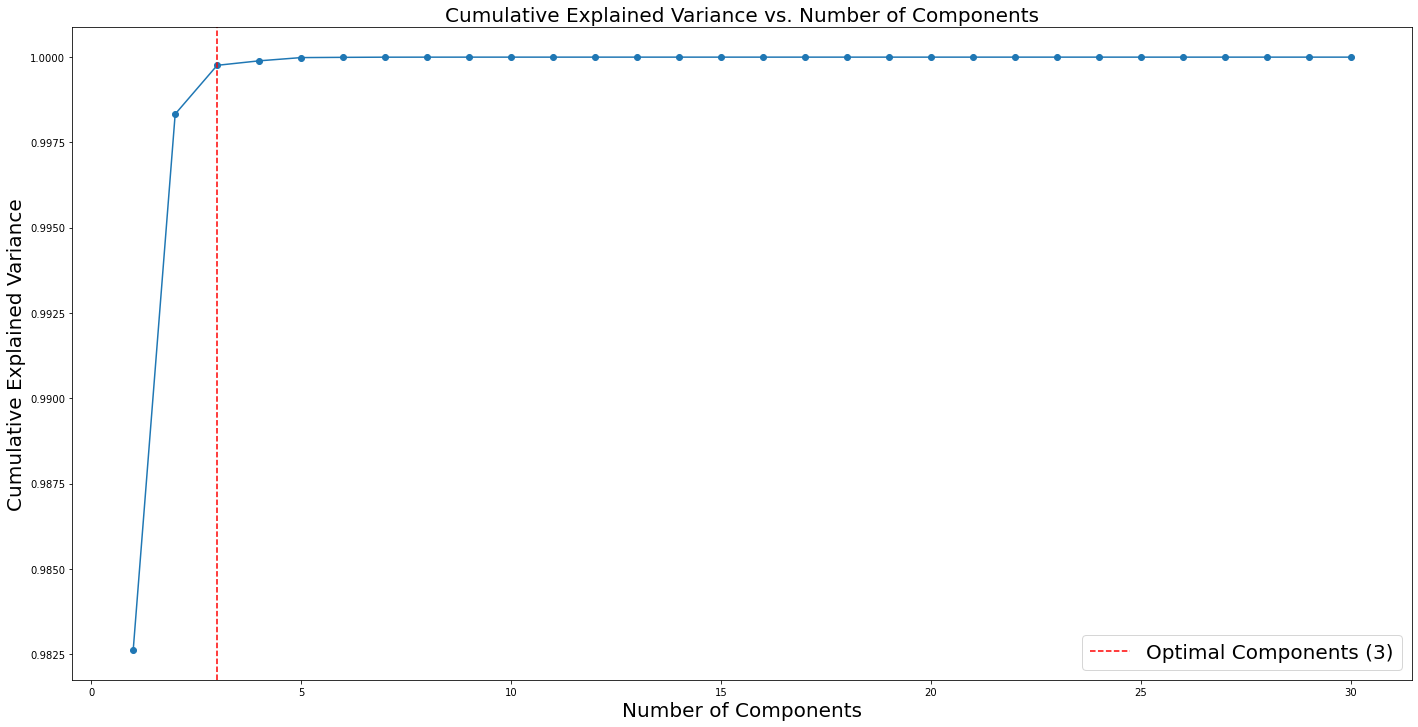

Optimal number of components based on Cumulative Explained Variance: 3


In [46]:
# Initialize a PCA model with a high number of components
pca = PCA(n_components=len(training_data[0]))

# Fit the PCA model to the training data
pca.fit(training_data)

# Calculate cumulative explained variance
cumulative_variance = []
explained_variance = pca.explained_variance_ratio_
for i in range(1, len(explained_variance) + 1):
    cumulative_variance.append(sum(explained_variance[:i]))

# Find the point where cumulative explained variance increase becomes incremental
incremental_threshold = 0.0005  # .05% 
optimal_cumulative_variance_components = None

for i in range(1, len(cumulative_variance)):
    if cumulative_variance[i] - cumulative_variance[i - 1] < incremental_threshold:
        optimal_cumulative_variance_components = i
        break

# Plot cumulative explained variance
plt.figure(figsize=(24, 12))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
if optimal_cumulative_variance_components:
    plt.axvline(x=optimal_cumulative_variance_components, color='r', linestyle='--', label=f'Optimal Components ({optimal_cumulative_variance_components})')
plt.xlabel('Number of Components', fontsize=20)
plt.ylabel('Cumulative Explained Variance', fontsize=20)
plt.title('Cumulative Explained Variance vs. Number of Components', fontsize=20)
plt.legend(fontsize=20)

plt.show()

# Print optimal component value
print(f"Optimal number of components based on Cumulative Explained Variance: {optimal_cumulative_variance_components}")

### Cross Validation

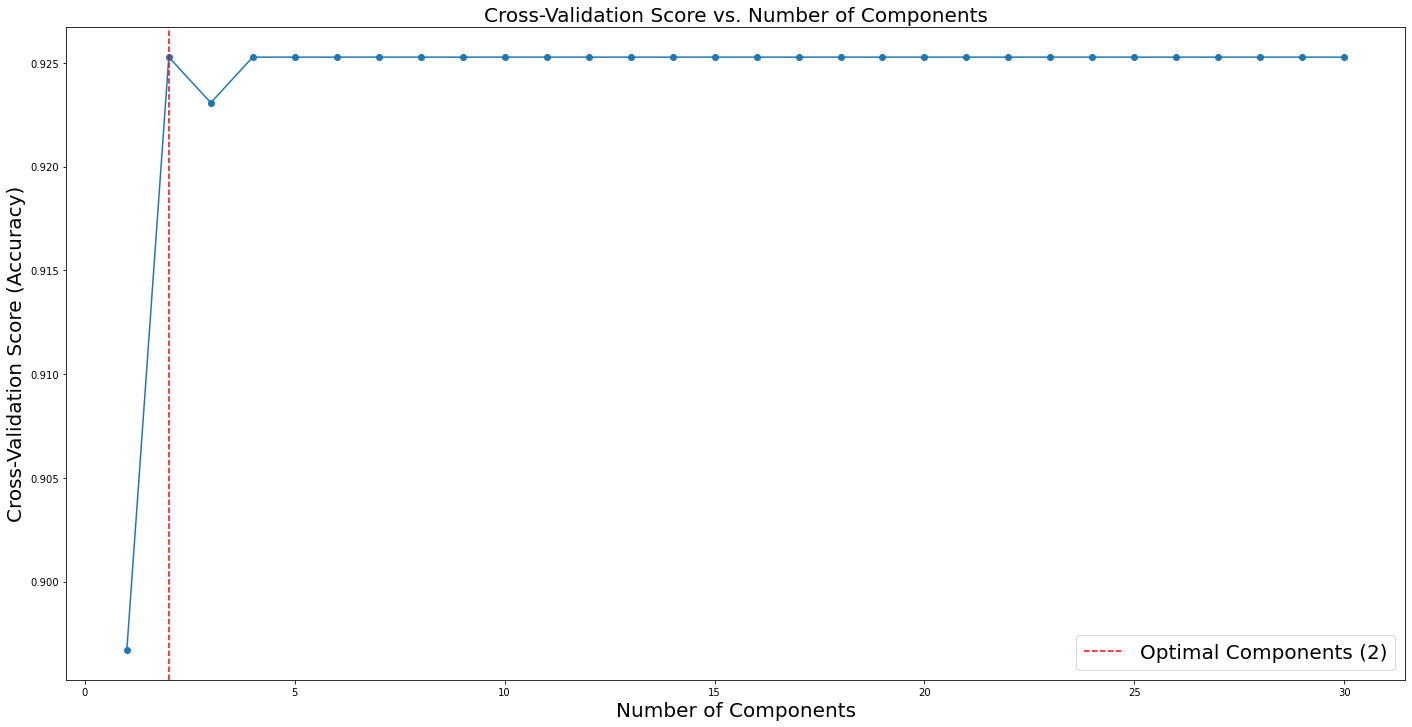

Optimal number of components based on Cross Validation Score (Accuracy): 2


In [47]:
# Perform cross-validation for different numbers of components
component_scores = []
for n_components in range(1, len(training_data[0]) + 1):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(training_data)
    classifier = KNeighborsClassifier(n_neighbors=23)  # Use your optimal k
    scores = cross_val_score(classifier, reduced_data, training_labels, cv=5)  # 5-fold cross-validation
    component_scores.append(scores.mean())

# Find the optimal number of components for cross-validation score
optimal_cv_components = component_scores.index(max(component_scores)) + 1

# Plot cross-validation scores
plt.figure(figsize=(24, 12))
plt.plot(range(1, len(component_scores) + 1), component_scores, marker='o')
plt.axvline(x=optimal_cv_components, color='r', linestyle='--', label=f'Optimal Components ({optimal_cv_components})')
plt.xlabel('Number of Components', fontsize=20)
plt.ylabel('Cross-Validation Score (Accuracy)', fontsize=20)
plt.title('Cross-Validation Score vs. Number of Components', fontsize=20)
plt.legend(fontsize=20)

plt.show()

# Print optimal component value
print(f"Optimal number of components based on Cross Validation Score (Accuracy): {optimal_cv_components}")

## K-Nearest Neighbors Clustering Visualization in 2D Space

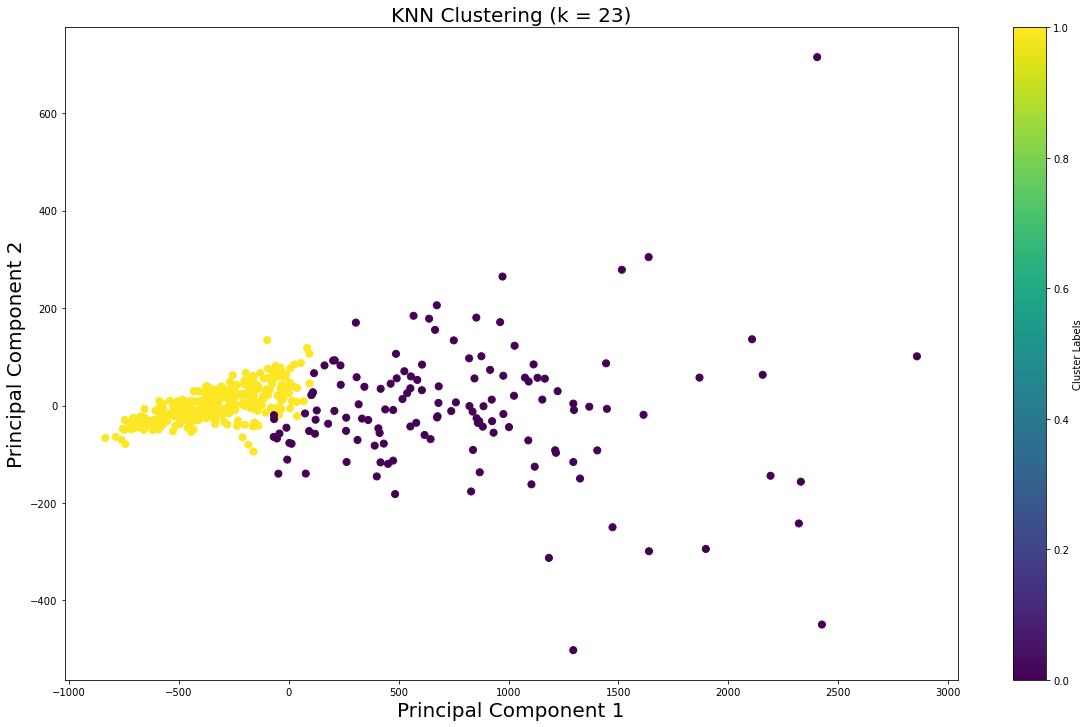

In [50]:
# Create a PCA instance with 2 components (for 2D visualization)
pca = PCA(n_components=optimal_cv_components)

# Fit and transform the data using PCA
data_2d = pca.fit_transform(training_data)  # You can use training_data or any other data you want to visualize

# Fit the KNN classifier with the training data
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(training_data, training_labels)

# Predict labels for the data points
predicted_labels = classifier.predict(training_data)

# Create a scatter plot of the data points, color-coded by predicted labels
plt.figure(figsize=(20, 12))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=predicted_labels, cmap='viridis', s=50)
plt.xlabel('Principal Component 1', fontsize=20)
plt.ylabel('Principal Component 2', fontsize=20)
plt.title(f'KNN Clustering (k = {optimal_k})', fontsize=20)

# Add a colorbar to show label-to-color mapping
plt.colorbar(scatter, label='Cluster Labels')

plt.show()